In [5]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('loan_approval_dataset.csv')
    print("I have successfully loaded 'loan_approval_dataset.csv'.")
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()

print("\n--- My dataset columns (after stripping whitespace) ---")
print(df.columns)

print("\n--- First 5 rows of my dataset ---")
print(df.head())

print("\n--- My dataset information (Columns, Non-Null Counts, Data Types) ---")
df.info()

print("\n--- My descriptive statistics for numerical columns ---")
print(df.describe())

print("\n--- Checking for Missing Values in my dataset ---")
print(df.isnull().sum())

print("\n--- Distribution of my target variable (loan_status) ---")
print(df['loan_status'].value_counts())

I have successfully loaded 'loan_approval_dataset.csv'.

--- My dataset columns (after stripping whitespace) ---
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

--- First 5 rows of my dataset ---
   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778          

In [6]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()

print("\n--- Re-checking for Missing Values in my dataset ---")
missing_values_count = df.isnull().sum().sum()
print(f"Total missing values in my dataset: {missing_values_count}")
if missing_values_count == 0:
    print("As confirmed, no missing values were found. No imputation/removal needed.")

print("\n--- Reviewing Data Types in my dataset ---")
print(df.dtypes.value_counts())
print("My data types appear appropriate for now. Categorical encoding will be handled in the next step.")

print("\n--- Checking for and handling negative 'residential_assets_value' ---")
negative_assets_count = df[df['residential_assets_value'] < 0].shape[0]
if negative_assets_count > 0:
    print(f"I found {negative_assets_count} rows with negative 'residential_assets_value'. I am setting these to 0.")
    df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0
else:
    print("No negative 'residential_assets_value' found.")

print("\n--- Descriptive statistics for 'residential_assets_value' after handling negative values ---")
print(df['residential_assets_value'].describe())

print("\nMy data cleaning and missing value handling steps are completed.")


--- Re-checking for Missing Values in my dataset ---
Total missing values in my dataset: 0
As confirmed, no missing values were found. No imputation/removal needed.

--- Reviewing Data Types in my dataset ---
int64     10
object     3
Name: count, dtype: int64
My data types appear appropriate for now. Categorical encoding will be handled in the next step.

--- Checking for and handling negative 'residential_assets_value' ---
I found 28 rows with negative 'residential_assets_value'. I am setting these to 0.

--- Descriptive statistics for 'residential_assets_value' after handling negative values ---
count    4.269000e+03
mean     7.473272e+06
std      6.502878e+06
min      0.000000e+00
25%      2.200000e+06
50%      5.600000e+06
75%      1.130000e+07
max      2.910000e+07
Name: residential_assets_value, dtype: float64

My data cleaning and missing value handling steps are completed.


In [8]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

print("\n--- Original DataFrame head before encoding ---")
print(df.head())

categorical_cols = ['education', 'self_employed', 'loan_status']

df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

print("\n--- DataFrame head after encoding categorical features and target ---")
print(df.head())

print("\n--- Value counts of encoded 'education' ---")
print(df['education'].value_counts())
print("\n--- Value counts of encoded 'self_employed' ---")
print(df['self_employed'].value_counts())
print("\n--- Value counts of encoded 'loan_status' ---")
print(df['loan_status'].value_counts())

df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

print("\n--- DataFrame head after adding 'Total_Income' feature ---")
print(df.head())

print("\n--- Descriptive statistics for 'Total_Income' ---")
print(df['Total_Income'].describe())

print("\nMy categorical encoding and feature engineering steps are completed.")


--- Original DataFrame head before encoding ---
   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0          

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})
df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

print("\n--- My features (X) shape and first 5 rows ---")
print(X.shape)
print(X.head())

print("\n--- My target (y) shape and first 5 values ---")
print(y.shape)
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- My training features (X_train) shape ---")
print(X_train.shape)
print("\n--- My testing features (X_test) shape ---")
print(X_test.shape)
print("\n--- My training target (y_train) shape ---")
print(y_train.shape)
print("\n--- My testing target (y_test) shape ---")
print(y_test.shape)

print("\n--- Distribution of target variable in training set (before SMOTE) ---")
print(y_train.value_counts(normalize=True))
print("\n--- Distribution of target variable in testing set ---")
print(y_test.value_counts(normalize=True))

baseline_model = DecisionTreeClassifier(random_state=42)

print("\nI am training a baseline Decision Tree model...")
baseline_model.fit(X_train, y_train)
print("I have finished training the baseline model.")

y_pred_baseline = baseline_model.predict(X_test)

print("\n--- Baseline Model Accuracy ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")

print("\n--- Baseline Model Classification Report ---")
print(classification_report(y_test, y_pred_baseline))


--- My features (X) shape and first 5 rows ---
(4269, 12)
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          1              0       9600000     29900000   
1                 0          0              1       4100000     12200000   
2                 3          1              0       9100000     29700000   
3                 3          1              0       8200000     30700000   
4                 5          0              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})
df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nI am training a Random Forest model...")
random_forest_model.fit(X_train, y_train)
print("I have finished training the Random Forest model.")

y_pred_rf = random_forest_model.predict(X_test)

print("\n--- Random Forest Model Accuracy ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

print("\n--- Random Forest Model Classification Report ---")
print(classification_report(y_test, y_pred_rf))


I am training a Random Forest model...
I have finished training the Random Forest model.

--- Random Forest Model Accuracy ---
Accuracy: 0.9719

--- Random Forest Model Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})
df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nI am re-training my Random Forest model for detailed evaluation...")
random_forest_model.fit(X_train, y_train)
print("I have finished re-training the Random Forest model.")

y_pred_rf = random_forest_model.predict(X_test)

print("\n--- Detailed Random Forest Model Classification Report ---")
print(classification_report(y_test, y_pred_rf))

minority_class_label = 0 
approved_class_label = 1 

precision_minority = precision_score(y_test, y_pred_rf, pos_label=minority_class_label)
recall_minority = recall_score(y_test, y_pred_rf, pos_label=minority_class_label)
f1_minority = f1_score(y_test, y_pred_rf, pos_label=minority_class_label)

print(f"\n--- Specific Metrics for 'Rejected' Loans (Minority Class) ---")
print(f"Precision (Rejected): {precision_minority:.4f}")
print(f"Recall (Rejected):    {recall_minority:.4f}")
print(f"F1-Score (Rejected):  {f1_minority:.4f}")

print("\nI have completed the detailed model evaluation focusing on imbalanced metrics.")


I am re-training my Random Forest model for detailed evaluation...
I have finished re-training the Random Forest model.

--- Detailed Random Forest Model Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854


--- Specific Metrics for 'Rejected' Loans (Minority Class) ---
Precision (Rejected): 0.9742
Recall (Rejected):    0.9497
F1-Score (Rejected):  0.9618

I have completed the detailed model evaluation focusing on imbalanced metrics.



I am re-training my Random Forest model for confusion matrix visualization...
I have finished re-training the Random Forest model.


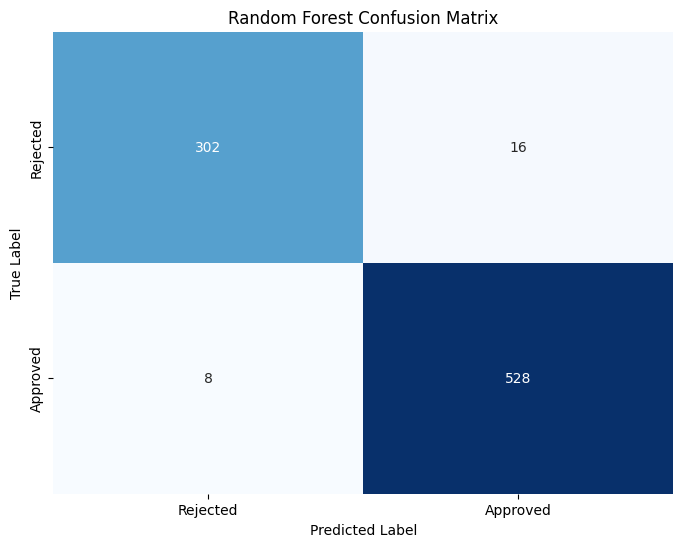


I have completed the confusion matrix visualization and analysis.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})
df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nI am re-training my Random Forest model for confusion matrix visualization...")
random_forest_model.fit(X_train, y_train)
print("I have finished re-training the Random Forest model.")

y_pred_rf = random_forest_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nI have completed the confusion matrix visualization and analysis.")


I am re-training my Random Forest model to get feature importances...
I have finished re-training the Random Forest model.

--- My Top 10 Most Important Features (Random Forest) ---
                     Feature  Importance
6                cibil_score    0.803063
5                  loan_term    0.056642
4                loan_amount    0.028640
7   residential_assets_value    0.018775
9        luxury_assets_value    0.016633
11              Total_Income    0.016510
3               income_annum    0.016498
8    commercial_assets_value    0.015802
10          bank_asset_value    0.014027
0           no_of_dependents    0.007798


C:\Users\rajaz\AppData\Local\Temp\ipykernel_27336\3102121437.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')


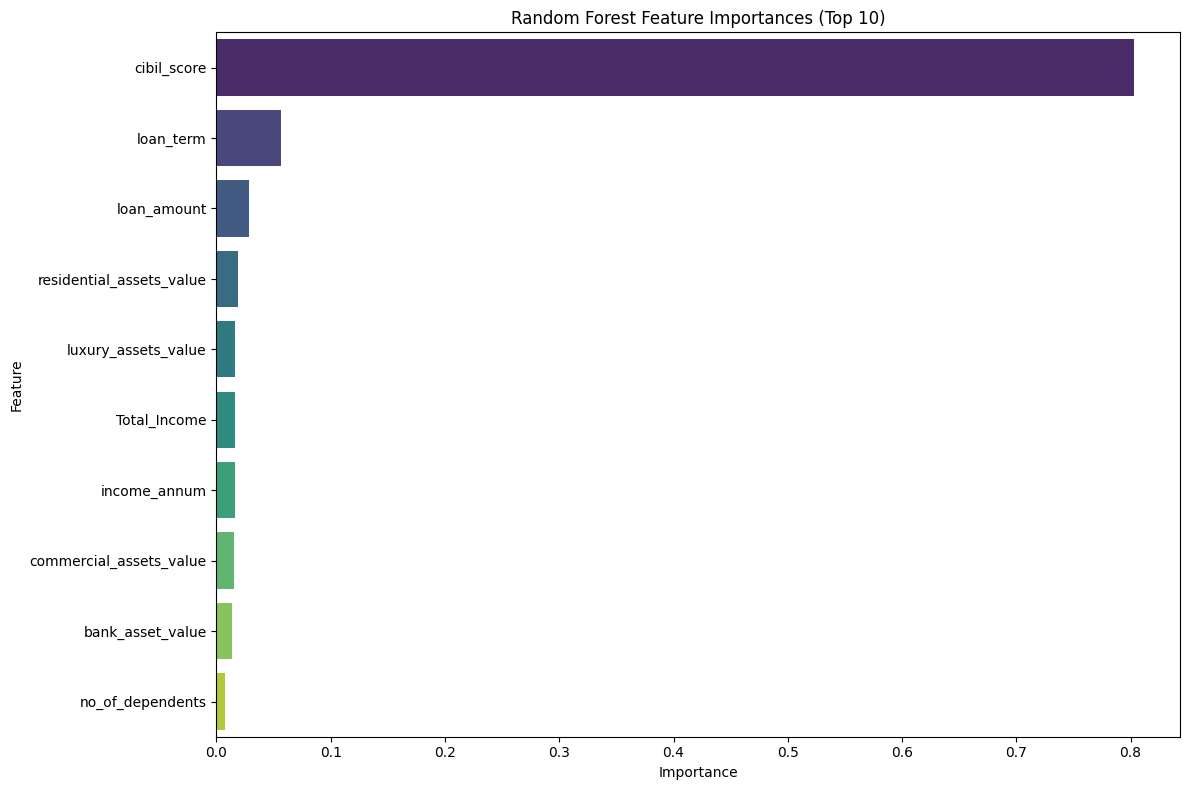

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})
df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nI am re-training my Random Forest model to get feature importances...")
random_forest_model.fit(X_train, y_train)
print("I have finished re-training the Random Forest model.")

feature_importances = random_forest_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

print("\n--- My Top 10 Most Important Features (Random Forest) ---")
print(features_df.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')
plt.title('Random Forest Feature Importances (Top 10)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})
df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Class distribution in training set BEFORE SMOTE ---")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n--- Class distribution in training set AFTER SMOTE ---")
print(y_train_smote.value_counts())

random_forest_model_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nI am training a Random Forest model on SMOTE-transformed data...")
random_forest_model_smote.fit(X_train_smote, y_train_smote)
print("I have finished training the Random Forest model on SMOTE-transformed data.")

y_pred_rf_smote = random_forest_model_smote.predict(X_test)

print("\n--- Random Forest Model Classification Report (after SMOTE) ---")
print(classification_report(y_test, y_pred_rf_smote))

minority_class_label = 0 

precision_minority_smote = precision_score(y_test, y_pred_rf_smote, pos_label=minority_class_label)
recall_minority_smote = recall_score(y_test, y_pred_rf_smote, pos_label=minority_class_label)
f1_minority_smote = f1_score(y_test, y_pred_rf_smote, pos_label=minority_class_label)

print(f"\n--- Specific Metrics for 'Rejected' Loans (Minority Class) after SMOTE ---")
print(f"Precision (Rejected): {precision_minority_smote:.4f}")
print(f"Recall (Rejected):    {recall_minority_smote:.4f}")
print(f"F1-Score (Rejected):  {f1_minority_smote:.4f}")


--- Class distribution in training set BEFORE SMOTE ---
loan_status
1    2120
0    1295
Name: count, dtype: int64

--- Class distribution in training set AFTER SMOTE ---
loan_status
1    2120
0    2120
Name: count, dtype: int64

I am training a Random Forest model on SMOTE-transformed data...
I have finished training the Random Forest model on SMOTE-transformed data.

--- Random Forest Model Classification Report (after SMOTE) ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


--- Specific Metrics for 'Rejected' Loans (Minority Class) after SMOTE ---
Precision (Rejected): 0.9687
Recall (Rejected):    0.9717
F1-Score (Rejected):  0.9702


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})
df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

print("\nI am training a Logistic Regression model on SMOTE-transformed data...")
logistic_regression_model.fit(X_train_smote, y_train_smote)
print("I have finished training the Logistic Regression model on SMOTE-transformed data.")

y_pred_lr_smote = logistic_regression_model.predict(X_test)

print("\n--- Logistic Regression Model Classification Report (after SMOTE) ---")
print(classification_report(y_test, y_pred_lr_smote))

minority_class_label = 0

precision_lr_minority_smote = precision_score(y_test, y_pred_lr_smote, pos_label=minority_class_label)
recall_lr_minority_smote = recall_score(y_test, y_pred_lr_smote, pos_label=minority_class_label)
f1_lr_minority_smote = f1_score(y_test, y_pred_lr_smote, pos_label=minority_class_label)

print(f"\n--- Specific Metrics for 'Rejected' Loans (Minority Class) after SMOTE (Logistic Regression) ---")
print(f"Precision (Rejected): {precision_lr_minority_smote:.4f}")
print(f"Recall (Rejected):    {recall_lr_minority_smote:.4f}")
print(f"F1-Score (Rejected):  {f1_lr_minority_smote:.4f}")


I am training a Logistic Regression model on SMOTE-transformed data...
I have finished training the Logistic Regression model on SMOTE-transformed data.

--- Logistic Regression Model Classification Report (after SMOTE) ---
              precision    recall  f1-score   support

           0       0.62      0.50      0.56       318
           1       0.73      0.82      0.77       536

    accuracy                           0.70       854
   macro avg       0.68      0.66      0.66       854
weighted avg       0.69      0.70      0.69       854


--- Specific Metrics for 'Rejected' Loans (Minority Class) after SMOTE (Logistic Regression) ---
Precision (Rejected): 0.6202
Recall (Rejected):    0.5031
F1-Score (Rejected):  0.5556


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})
df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

baseline_model = DecisionTreeClassifier(random_state=42)
print("\nI am training my baseline Decision Tree model...")
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
print("I have finished training the baseline model.")

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("\nI am training my untuned Random Forest model...")
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
print("I have finished training the untuned Random Forest model.")

random_forest_model_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("\nI am training my Random Forest model on SMOTE-transformed data...")
random_forest_model_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = random_forest_model_smote.predict(X_test)
print("I have finished training the Random Forest model on SMOTE-transformed data.")

logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
print("\nI am training my Logistic Regression model on SMOTE-transformed data...")
logistic_regression_model.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = logistic_regression_model.predict(X_test)
print("I have finished training the Logistic Regression model on SMOTE-transformed data.")

models = {
    'Baseline DT': y_pred_baseline,
    'RF (Untuned)': y_pred_rf,
    'RF (SMOTE)': y_pred_rf_smote,
    'LR (SMOTE)': y_pred_lr_smote
}

metrics_summary = []

minority_class_label = 0

for name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision_min = precision_score(y_test, y_pred, pos_label=minority_class_label)
    recall_min = recall_score(y_test, y_pred, pos_label=minority_class_label)
    f1_min = f1_score(y_test, y_pred, pos_label=minority_class_label)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    metrics_summary.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Rejected)': precision_min,
        'Recall (Rejected)': recall_min,
        'F1-Score (Rejected)': f1_min,
        'Macro F1-Score': f1_macro,
        'Weighted F1-Score': f1_weighted
    })

metrics_df = pd.DataFrame(metrics_summary)

print("\n--- Comprehensive Model Comparison ---")
print(metrics_df.round(4))


I am training my baseline Decision Tree model...
I have finished training the baseline model.

I am training my untuned Random Forest model...
I have finished training the untuned Random Forest model.

I am training my Random Forest model on SMOTE-transformed data...
I have finished training the Random Forest model on SMOTE-transformed data.

I am training my Logistic Regression model on SMOTE-transformed data...
I have finished training the Logistic Regression model on SMOTE-transformed data.

--- Comprehensive Model Comparison ---
          Model  Accuracy  Precision (Rejected)  Recall (Rejected)  \
0   Baseline DT    0.9754                0.9744             0.9591   
1  RF (Untuned)    0.9719                0.9742             0.9497   
2    RF (SMOTE)    0.9778                0.9687             0.9717   
3    LR (SMOTE)    0.7002                0.6202             0.5031   

   F1-Score (Rejected)  Macro F1-Score  Weighted F1-Score  
0               0.9667          0.9736           

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from imblearn.over_sampling import SMOTE
from scipy.stats import randint

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})
df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

rf_tuned_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist_rf,
    n_iter=10, 
    cv=3,       
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1_macro' 
)

print("\nI am about to start hyperparameter tuning for my RF (SMOTE) model...")
rf_tuned_search.fit(X_train_smote, y_train_smote)
print("I have finished hyperparameter tuning for the RF (SMOTE) model.")

print("\n--- Best Parameters for RF (SMOTE) ---")
print(rf_tuned_search.best_params_)

print("\n--- Best Score (Macro F1) from RF (SMOTE) Tuning ---")
print(f"{rf_tuned_search.best_score_:.4f}")

best_rf_smote_model = rf_tuned_search.best_estimator_
y_pred_tuned_rf_smote = best_rf_smote_model.predict(X_test)

print("\n--- Tuned RF (SMOTE) Model Accuracy ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned_rf_smote):.4f}")

print("\n--- Tuned RF (SMOTE) Model Classification Report ---")
print(classification_report(y_test, y_pred_tuned_rf_smote))


I am about to start hyperparameter tuning for my RF (SMOTE) model...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
I have finished hyperparameter tuning for the RF (SMOTE) model.

--- Best Parameters for RF (SMOTE) ---
{'bootstrap': True, 'max_depth': 38, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 171}

--- Best Score (Macro F1) from RF (SMOTE) Tuning ---
0.9802

--- Tuned RF (SMOTE) Model Accuracy ---
Accuracy: 0.9813

--- Tuned RF (SMOTE) Model Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854




I am re-running Random Forest hyperparameter tuning to obtain the final best model...
I have obtained the final best Random Forest model.

--- Final Model Accuracy ---
Accuracy: 0.9813

--- Final Model Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



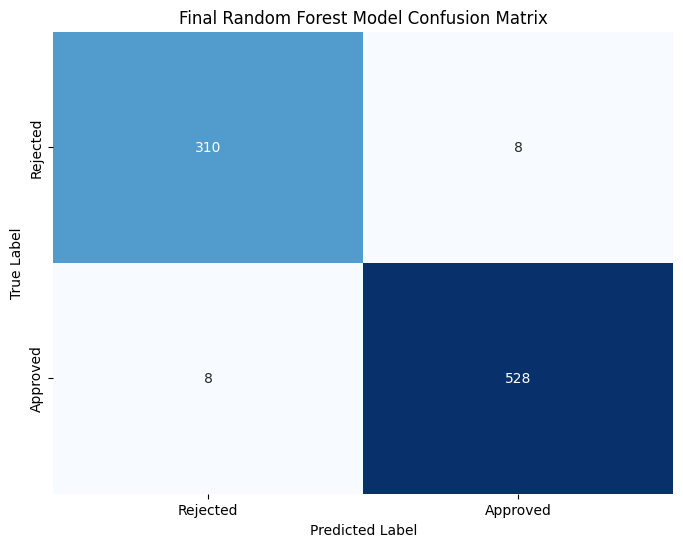

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

try:
    df = pd.read_csv('loan_approval_dataset.csv')
except FileNotFoundError:
    print("Error: 'loan_approval_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

df.columns = df.columns.str.strip()
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

df['education'] = df['education'].str.strip().map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].str.strip().map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].str.strip().map({'Approved': 1, 'Rejected': 0})
df['Total_Income'] = df['income_annum'] + df['bank_asset_value']

X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

rf_tuned_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=3,
    verbose=0, 
    random_state=42,
    n_jobs=-1,
    scoring='f1_macro'
)

print("\nI am re-running Random Forest hyperparameter tuning to obtain the final best model...")
rf_tuned_search.fit(X_train_smote, y_train_smote)
best_rf_smote_model = rf_tuned_search.best_estimator_
print("I have obtained the final best Random Forest model.")

y_pred_final = best_rf_smote_model.predict(X_test)

print("\n--- Final Model Accuracy ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")

print("\n--- Final Model Classification Report ---")
print(classification_report(y_test, y_pred_final))

cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Final Random Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()